<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/UfcgBrasao.jpg/1200px-UfcgBrasao.jpg" width=120 height=120>

<font face='courier'><B><h4>Laboratório de Princípios de Comunicações (LPC) </Br>
Período 2021.1e </h4><h5>Tema(s): Introdução ao GNU Radio. Séries de Fourier. Distorção.</Br>
 Professor: Bruno B. Albert</Br>
 Preparação - Experimento I
 </Br>Nome: Áleff Azevedo Dias</Br>Matrícula: 119210241</h5></B>
</font>
</center>

In [ ]:
#Configurando notebook

from IPython.core.pylabtools import figsize

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [ ]:
# Carrega pacotes
import matplotlib.pyplot as plt
from scipy.signal import square, sawtooth
import pandas as pd
import numpy as np
from sympy import *

# configura notebook
pd.set_option("display.precision", 2)
pd.options.display.float_format = '{:,.2f}'.format
figsize(10, 3)

IPython_default = plt.rcParams.copy()
plt.rc('grid', color='k', linestyle='-', linewidth=0.5)
plt.rcParams['axes.grid'] = True

# **1. Determine as séries de Fourier trigonométricas das formas de onda periódicas ilustradas na Figura 1.**
<font face='courier'>

Sabemos que,

$$ 
\begin{equation}
f(t)=\frac{a_{0}}{2}+\sum_{n=1}^{\infty}\left[a_{n} \cos \left(\omega_0 n t\right)+b_{n} \sin \left(\omega_0 n t\right)\right] 
\end{equation}
$$

onde $a_n$ e $b_n$ são os coeficientes de Fourier da expansão de $f(t)$, calculados de acordo com as expressões

$$
\begin{equation}
a_{n}=\frac{2}{T_0} \int_{T_0} f(t) \ \cos \left(\omega_0 n t\right) dt 
\end{equation}
$$

$$
\begin{equation}
b_{n}=\frac{2}{T_0} \int_{T_0} f(t) \ \sin \left(\omega_0 n t\right) dt
\end{equation}
$$


E o coeficiente relativo ao nível DC para $f(t) = 0$,

$$
\begin{equation}
a_{0}=\frac{1}{T_0} \int_{T_0} f(t) \ dt 
\end{equation}
$$


Portanto, a priori, partindo desses conceitos, irei determinar analiticamente os coeficiêntes dos sinais indicados.</font>

In [ ]:
# Declarando variáveis
x = symbols('x')
# Declarando inteiros
n = symbols('n', integer=True)
K, T, f = symbols('A, T, f', real = True)

init_printing()

f0 = 150            # Frequencia fundamental - [Hz]
T0 = 1/f0           #Período fundamental - [s]
w0 = 2 * pi * f0

# Equações de integração de Fourier
c = Lambda(x, cos (w0*n*x))
s = Lambda(x, sin (w0*n*x))


# Quesito a

# Equações de reta do problema
fa = Lambda(x, -1)
ga = Lambda(x, 1)

# Encontrando a0
a0a =  integrate((1/T0)*fa(x), (x, -T0/2, 0)) + integrate((1/T0)*ga(x), (x, 0, T0/2))

# Encontrando an
ana =  integrate((2/T0)*fa(x)*c(x), (x, -T0/2, 0)) + integrate((2/T0)*ga(x)*c(x), (x, 0, T0/2))

# Encontrando bn
bna = integrate((2/T0)*fa(x)*s(x), (x, -T0/2, 0)) + integrate((2/T0)*ga(x)*s(x), (x, 0, T0/2))


# Quesito b

# Equações de reta do problema
fb = Lambda(x, -600*x-1)
gb = Lambda(x, 600*x-1)

# Encontrando a0
a0b = integrate((1/T0)*fb(x), (x, -T0/2, 0)) + integrate((1/T0)*gb(x), (x, 0, T0/2))

# Encontrando an
anb = integrate((2/T0)*fb(x)*c(x), (x, -T0/2, 0)) + integrate((2/T0)*gb(x)*c(x), (x, 0, T0/2))

# Encontrando bn
bnb = integrate((2/T0)*fb(x)*s(x), (x, -T0/2, 0)) + integrate((2/T0)*gb(x)*s(x), (x, 0, T0/2))


# Quesito c

# Equações de reta do problema
fc = Lambda(x, 300*x + 1)
gc = Lambda(x, 300*x - 1)

# Encontrando a0
a0c = integrate((1/T0)*fc(x), (x, -T0/2, 0)) + integrate((1/T0)*gc(x), (x, 0, T0/2))

# Encontrando an
anc = integrate((2/T0)*fc(x)*c(x), (x, -T0/2, 0)) + integrate((2/T0)*gc(x)*c(x), (x, 0, T0/2))

# Encontrando bn
bnc = integrate((2/T0)*fc(x)*s(x), (x, -T0/2, 0)) + integrate((2/T0)*gc(x)*s(x), (x, 0, T0/2))


In [ ]:
# Geração de sinais periódicos

fa = 400*f0  # Frequência de amostragem

t    = np.arange(0, 40e-3, 1/fa)
π    = np.pi

A    = 1     # amplitude
ϕ    = 0*π/4 # fase

# gera sinais periódicos
quad   = A*square(2*π*f0*t + ϕ)                # onda quadrada com frequência fundamental f0 e phase inicial ϕ
triang = A*sawtooth(2*π*f0*t + ϕ, width = 0.5) # onda triangular com frequência fundamental f0 e phase inicial ϕ
dente  = A*sawtooth(2*π*f0*t + ϕ)              # onda dente de serra com frequência fundamental f0 e phase inicial ϕ

## **a) Onda Quadrada**

### ***Gráfico***

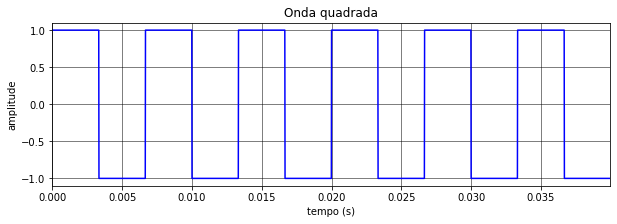

In [ ]:
plt.figure()
plt.plot(t, quad,'b')
plt.ylim(quad.min(0)-0.1, quad.max(0)+0.1)
plt.xlim(0,t.max(0))
plt.title('Onda quadrada')
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.show()


### ***Análise Analítica***

In [ ]:
a0a

<font face='courier'>

$$a_0 =  0 $$

In [ ]:
ana

⎛⎧ 0    for n ≠ 0⎞   ⎛⎧ 0   for n ≠ 0⎞
⎜⎨               ⎟ + ⎜⎨              ⎟
⎝⎩-1.0  otherwise⎠   ⎝⎩1.0  otherwise⎠

<font face='courier'>

Logo,

$$a_n = 0$$


In [ ]:
bna

  ⎛⎧      n                 ⎞
  ⎜⎪  (-1)    1.0           ⎟
  ⎜⎪- ───── + ───  for n ≠ 0⎟
2⋅⎜⎨   π⋅n    π⋅n           ⎟
  ⎜⎪                        ⎟
  ⎜⎪      0        otherwise⎟
  ⎝⎩                        ⎠

<font face='courier'>

Observe que $n \in \ \forall \ \mathbb{Z}^*_+$,  portanto
$$
b_n = 2 \ \frac{1 - (-1)^n}{\pi n}
$$

### ***Análise Numérica***

In [ ]:
def fourierCoeff(t, f, P, ncoeffs):
    """
     t  : vetor de instantes de tempo contendo pelo menos um período completo da função [segundos]
     f  : vetor de valores de f(t) calculados para cada instante em t 
     P  : período fundamental de f [segundos]
     ncoeffs: número de coeficiente de Fourier desejado [número inteiro maior que zero]
     
     an : coeficiente an
     bn : coeficiente bn
     
    """    
    dt = t[1]-t[0]          # período de amostragem [passo de integração]
    N  = int(np.ceil(P/dt)) # número de amostras correspondente a um período completo da onda   
    
    an = np.zeros((ncoeffs, 1)) # coeficientes an
    bn = np.zeros((ncoeffs, 1)) # coeficientes bn
    
    # cálculo dos coeficientes an e bn utilizando o método trapezoidal de integração numérica     
    for n in range(0, ncoeffs):# calcula coeficientes de Fourier para n=0 até n=ncoeffs-1
        an[n] = np.trapz(f[0:N]*cos(2*np.pi*t[0:N]*n/P), dx=dt)
        bn[n] = np.trapz(f[0:N]*sin(2*np.pi*t[0:N]*n/P), dx=dt)         
    
    an = an*2/P
    bn = bn*2/P
    
    return an, bn

,0,1,2,3,4,5,6,7,8,9
$a_{n}$,0.00,0.01,-0.00,0.01,-0.00,0.01,-0.00,0.01,-0.00,0.01
$b_{n}$,0.00,1.27,-0.00,0.42,-0.00,0.25,-0.00,0.18,-0.00,0.14


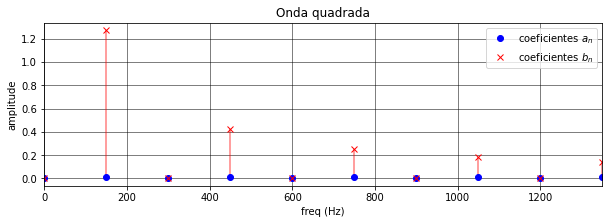

In [ ]:
import numpy as np
from numpy import cos, sin, arctan2, sqrt, log10
# Coeficientes de Fourier da onda quadrada

ncoeffs = 10  # número de componentes harmônicos (incluindo componente dc, n=0)

xf = f0*np.arange(0, ncoeffs) # frequências de cada componente harmônico

# calcula coeficientes de Fourier
quad_an, quad_bn = fourierCoeff(t, quad , 1/f0, ncoeffs)

# plota gráfico
plt.figure()
plt.plot(xf, quad_an,'bo',label = 'coeficientes $a_{n}$')
plt.vlines(xf, 0, quad_an,'b', alpha=0.5)
plt.plot(xf, quad_bn,'rx',label = 'coeficientes $b_{n}$')
plt.vlines(xf, 0, quad_bn,'r', alpha=0.5)

plt.title('Onda quadrada')
plt.legend()
plt.xlim(0,xf.max(0))
#plt.ylim(-2,2)
plt.xlabel('freq (Hz)')
plt.ylabel('amplitude')

# Gera tabela com os coeficientes an, bn
pd.DataFrame(np.hstack((quad_an, quad_bn)), columns=["$a_{n}$", "$b_{n}$"]).T

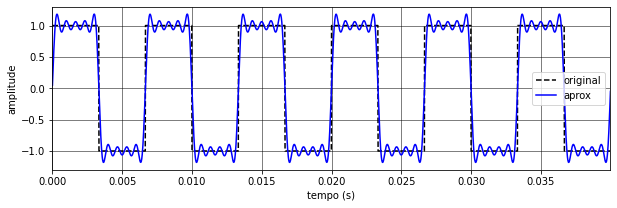

In [ ]:
# Aproximação da onda quadrada via somatório de harmônicas da série de Fourier

ncoeffs = 10 # número de componentes harmônicos (incluindo componente dc, n=0)

# calcula aproximação do sinal com um somatório finito de harmônicos
quad_aprox = np.zeros(len(t))
for n in range(0,ncoeffs):
    if n != 0:
        quad_aprox += quad_an[n]*cos(2*π*n*f0*t) + quad_bn[n]*sin(2*π*n*f0*t) # soma n-ésimo componente harmônico
    else:
        quad_aprox += quad_an[n]/2

plt.plot(t, quad,'k--',label = 'original')        
plt.plot(t,quad_aprox,'b',label = 'aprox')
plt.xlim(0,t.max(0))
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.legend();

## **b) Onda Triangular**

### ***Gráfico***

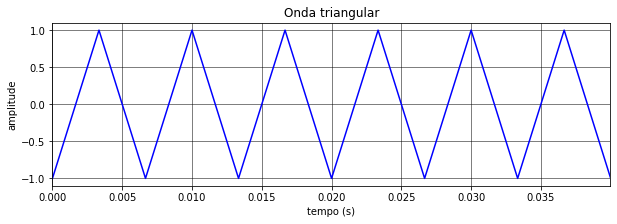

In [ ]:
plt.figure()
plt.plot(t, triang,'b')
plt.ylim(triang.min(0)-0.1, triang.max(0)+0.1)
plt.xlim(0,t.max(0))
plt.title('Onda triangular')
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.show()

### ***Análise Analítica***

In [ ]:
a0b

<font face='courier'>

$$a_0  \approx 0$$


In [ ]:
anb

  ⎛⎧         n                     ⎞
  ⎜⎪ 2.0⋅(-1)     2.0              ⎟
  ⎜⎪ ───────── - ─────    for n ≠ 0⎟
2⋅⎜⎨    2  2      2  2             ⎟
  ⎜⎪   π ⋅n      π ⋅n              ⎟
  ⎜⎪                               ⎟
  ⎝⎩2.22044604925031e-16  otherwise⎠

<font face='courier'>

Como $n \in \ \forall \ \mathbb{Z}^*_+ $,

$$a_n = 2 \ \frac{2 \ (-1)^n - 2}{\pi^2n^2} $$

In [ ]:
bnb

⎛⎧      n                 ⎞   ⎛⎧        n                 ⎞
⎜⎪  (-1)     1            ⎟   ⎜⎪1.0⋅(-1)    1.0           ⎟
⎜⎪- ───── - ───  for n ≠ 0⎟   ⎜⎪───────── + ───  for n ≠ 0⎟
⎜⎨   π⋅n    π⋅n           ⎟ + ⎜⎨   π⋅n      π⋅n           ⎟
⎜⎪                        ⎟   ⎜⎪                          ⎟
⎜⎪      0        otherwise⎟   ⎜⎪       0         otherwise⎟
⎝⎩                        ⎠   ⎝⎩                          ⎠

<font face='courier'>

Simplificando a equação acima, determinamos que,

$$b_n = 0$$

### ***Análise Numérica***

,0,1,2,3,4,5,6
$a_{n}$,0.00,-0.81,0.00,-0.09,0.00,-0.03,0.00
$b_{n}$,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00


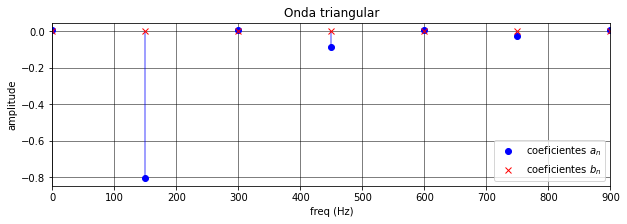

In [ ]:
# Coeficientes de Fourier da onda triangular

ncoeffs = 7 # número de componentes harmônicos (incluindo componente dc, n=0)

xf = f0*np.arange(0, ncoeffs) # frequências de cada componente harmônico

# calcula coeficientes de Fourier
triang_an, triang_bn = fourierCoeff(t, triang , 1/f0, ncoeffs)

# plota gráfico
plt.figure()
plt.plot(xf, triang_an,'bo',label = 'coeficientes $a_{n}$')
plt.vlines(xf, 0, triang_an,'b', alpha=0.5)
plt.plot(xf, triang_bn,'rx',label = 'coeficientes $b_{n}$')
plt.vlines(xf, 0, triang_bn,'r', alpha=0.5)

plt.title('Onda triangular')
plt.legend()
plt.xlim(0,xf.max(0))
plt.xlabel('freq (Hz)')
plt.ylabel('amplitude')

# Gera tabela com os coeficientes an, bn
pd.DataFrame(np.hstack((triang_an, triang_bn)), columns=["$a_{n}$", "$b_{n}$"]).T

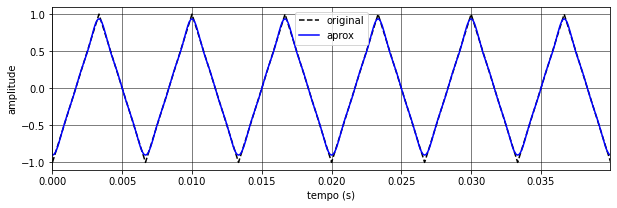

In [ ]:
# Aproximação da onda triangular via somatório de harmônicas da série de Fourier

ncoeffs = 7 # número de componentes harmônicos (incluindo componente dc, n=0)

# calcula aproximação do sinal com um somatório finito de harmônicos
triang_aprox = np.zeros(len(t))
for n in range(0,ncoeffs):
    if n != 0:
        triang_aprox += triang_an[n]*cos(2*π*n*f0*t) + triang_bn[n]*sin(2*π*n*f0*t) # soma n-ésimo componente harmônico
    else:
        triang_aprox += triang_an[n]/2

plt.plot(t, triang,'k--',label = 'original')        
plt.plot(t,triang_aprox,'b',label = 'aprox')
plt.xlim(0,t.max(0))
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.legend();

## **c) Onda Dente de Serra**

### ***Gráfico***

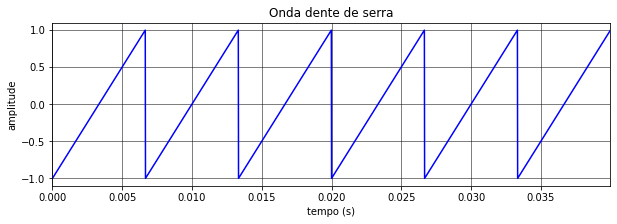

In [ ]:
plt.figure()
plt.plot(t, dente,'b')
plt.ylim(dente.min(0)-0.1, dente.max(0)+0.1)
plt.xlim(0,t.max(0))
plt.title('Onda dente de serra')
plt.xlabel('tempo (s)')
plt.ylabel('amplitude');
plt.show()

### ***Análise Analítica***

In [ ]:
a0c

<font face='courier'>

$$a_0 = 0 $$

In [ ]:
anc

⎛⎧      n                   ⎞   ⎛⎧        n                   ⎞
⎜⎪  (-1)     1.0            ⎟   ⎜⎪1.0⋅(-1)      1             ⎟
⎜⎪- ───── + ─────  for n ≠ 0⎟   ⎜⎪───────── - ─────  for n ≠ 0⎟
⎜⎨   2  2    2  2           ⎟ + ⎜⎨   2  2      2  2           ⎟
⎜⎪  π ⋅n    π ⋅n            ⎟   ⎜⎪  π ⋅n      π ⋅n            ⎟
⎜⎪                          ⎟   ⎜⎪                            ⎟
⎝⎩      0.5        otherwise⎠   ⎝⎩      -0.5         otherwise⎠

<font face='courier'>

Simplificando a equação acima, determinamos que
$$a_n = 0$$

In [ ]:
bnc

  ⎛⎧-1.0            ⎞
  ⎜⎪─────  for n ≠ 0⎟
2⋅⎜⎨ π⋅n            ⎟
  ⎜⎪                ⎟
  ⎝⎩  0    otherwise⎠

<font face='courier'>

Como $n \in \ \forall \ \mathbb{Z}^*_+ $,

$$
b_n = \dfrac{-2}{\pi n}
$$

### ***Análise Numérica***

,0,1,2,3,4,5,6,7,8,9
$a_{n}$,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
$b_{n}$,0.00,-0.64,-0.32,-0.21,-0.16,-0.13,-0.11,-0.09,-0.08,-0.07


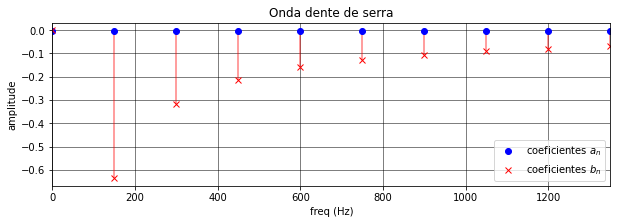

In [ ]:
# Coeficientes de Fourier da onda dente de serra

ncoeffs = 10 # número de componentes harmônicos (incluindo componente dc, n=0)

xf = f0*np.arange(0, ncoeffs) # frequências de cada componente harmônico

# calcula coeficientes de Fourier
dente_an, dente_bn = fourierCoeff(t, dente , 1/f0, ncoeffs)

# plota gráficos
plt.figure()
plt.plot(xf, dente_an,'bo',label = 'coeficientes $a_{n}$')
plt.vlines(xf, 0, dente_an,'b', alpha=0.5)
plt.plot(xf, dente_bn,'rx',label = 'coeficientes $b_{n}$')
plt.vlines(xf, 0, dente_bn,'r', alpha=0.5)

plt.title('Onda dente de serra')
plt.legend()
plt.xlim(0,xf.max(0))
plt.xlabel('freq (Hz)')
plt.ylabel('amplitude')

# Gera tabela com os coeficientes an, bn
pd.DataFrame(np.hstack((dente_an, dente_bn)), columns=["$a_{n}$", "$b_{n}$"]).T

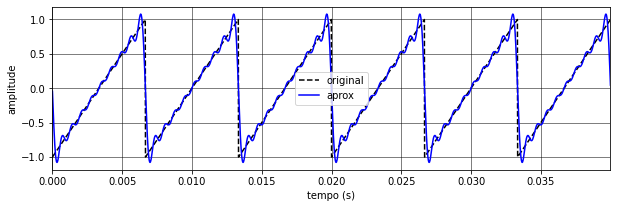

In [ ]:
# Aproximação da onda dente de serra via somatório de harmônicas da série de Fourier

ncoeffs = 10 # número de componentes harmônicos (incluindo componente dc, n=0)

# calcula aproximação do sinal com um somatório finito de harmônicos
dente_aprox = np.zeros(len(t))
for n in range(0,ncoeffs):
    if n != 0:
        dente_aprox += dente_an[n]*cos(2*π*n*f0*t) + dente_bn[n]*sin(2*π*n*f0*t) # soma n-ésimo componente harmônico
    else:
        dente_aprox += dente_an[n]/2

plt.plot(t, dente,'k--',label = 'original')        
plt.plot(t, dente_aprox,'b',label = 'aprox')
plt.xlim(0,t.max(0))
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.legend();

# **2. Mudar a frequência fundamental afetará a potência de um sinal periódico? Explique. E a sua ocupação de banda? Explique.**

<font face='courier'>

A priore, tomemos um sinal $$x(t) = sen(2\pi f_0 t + \phi),$$ 
Onde $f0 = 150 Hz$

In [ ]:
f1= 150
sinal = A*sin(2*π*f1*t + ϕ)

# Cálculo da energia
E_quad = np.sum(abs(sinal)**2)

# Cálculo da potência
N = len(sinal)
P_quad = np.sum(abs(sinal)**2)/N

print('Potência = %3.2f unidades de potência' %(P_quad))

Potência = 0.50 unidades de potência


<font face='courier'>

Agora, tomemos o mesmo sinal $x(t)$ e apliquemos uma frequência fundamental $f0 = 1500 Hz$.

In [ ]:
f2 = 1500
sinal = A*sin(2*π*f2*t + ϕ)

# Cálculo da energia
E_quad = np.sum(abs(sinal)**2)

# Cálculo da potência
N = len(sinal)
P_quad = np.sum(abs(sinal)**2)/N

print('Potência = %3.2f unidades de potência' %(P_quad))

Potência = 0.50 unidades de potência


<font face='courier'>

Note que a potência em ambas as situações são iguais, mesmo alterando a frequência fundamental. 

Observe a seguinte equação,

$$
P_{x}=\lim _{T \rightarrow \infty} \frac{1}{2 T} \int_{-T}^{T}|x(t)|^{2} dt
$$

Resolvendo essa integral indefinida, encontramos que,

In [ ]:
from sympy import *

integrate(((1/(2*T))*(K*sin(2*pi*f*x))**2), (x, -T,T))


⎧   2 ⎛         sin(2⋅π⋅T⋅f)⋅cos(2⋅π⋅T⋅f)⎞    2 ⎛        sin(2⋅π⋅T⋅f)⋅cos(2⋅π⋅
⎪  A ⋅⎜-π⋅T⋅f + ─────────────────────────⎟   A ⋅⎜π⋅T⋅f - ─────────────────────
⎪     ⎝                     2            ⎠      ⎝                    2        
⎨- ─────────────────────────────────────── + ─────────────────────────────────
⎪                  4⋅π⋅T⋅f                                  4⋅π⋅T⋅f           
⎪                                                                             
⎩                                        0                                    

T⋅f)⎞           
────⎟           
    ⎠           
─────  for f ≠ 0
                
                
       otherwise

<font face='courier'>

Aplicando os limites de integração com $T \rightarrow \infty$, determinamos que

$$
P_x = \dfrac{A^2}{2}
$$

A partir disto, chegamos a conclusão que a potência do sinal não depende da frequência fundamental. Se analisarmos a integral de potência, percebemos que ela estima a área ponderada de um sinal. Portanto, ainda que apliquemos frequências diferentes ao mesmo sinal, ele não irá alterar sua área ponderada.

<font face='courier'>

Oposto a isso, ao mudarmos a frequência fundamental de um mesmo sinal, alteramos diretamente a ocupação de banda. Pois esta é o intervalo de frequências em que a maior parte da potência do sinal está contida. Portanto, a medida que se aumenta a frequência fundamental, aumenta-se a ocupação de banda.

# **3. A antena do seu aparelho celular capta uma potência de sinal geralmente em torno de −60 dBm (excelente conexão) e −110 dBm (conexão muito ruim). Quais são os valores de potência em mW correspondentes a estes limiares? E em dBW?.**

In [ ]:
#Conversão de potências
10**(-60/10)

In [ ]:
10*log10(10**(-6)*10**(-3))

<font face='courier'>

Para $-60 \ dBm$

$$P = 1\ .\ 10^{-6} \ mW$$
e
$$P_{dBW} = -90 \ dBW$$

In [ ]:
10**(-110/10)

In [ ]:
10*log10(10**(-11)*10**(-3))

<font face='courier'>

Para $-110 \ dBm$
$$P = 1\ .\ 10^{-11} \ mW$$
e
$$P_{dBW} = - 140 \ dBW$$